# Probability Distributions in R


Many of the standard probability distributions have functions in R to calculate:

- probability density/mass function (d)

- cumulative distribution function (p)

- quantile function (q)

- random draws (r)
The letter after each indicates the letter the function will start with for all distributions.

## Discrete distributions
If the support of the random variable is a finite or countably infinite number of values, then the random variable is discrete. Discrete random variables have a probability mass function (pmf). This pmf gives the probability that a random variable will take on each value in its support. The cumulative distribution function (cdf) provides the probability the random variable is less than or equal to a particular value. The quantile function is the inverse of the cumulative distribution function, i.e. you provide a probability and the quantile function returns the value of the random variable such the cdf will return that probability.

### Binomial distribution

Whenever you repeat an experiment and you assume

 1. the probability of success is the same each time and 
 
 2. each trial of the experiment is independent of the rest (as long as you know the probability of success).
 
Then, if you record the number of success out of the total, you have a **binomial distribution**.

For example, consider an experiment with probability of success of 0.7 and 13 trials, i.e. $X \sim \operatorname{Bin}(13,0.7)$.

We can use the pmf to calculate the probability of a particular outcome of the experiment. For example, what is the probability of seeing 6 successes? We can use the `dbinom` function.

In [22]:
n <- 13
p <- 0.7
dbinom(6, size = n, prob = p)

[1] 0.0441524

The entire pmf is

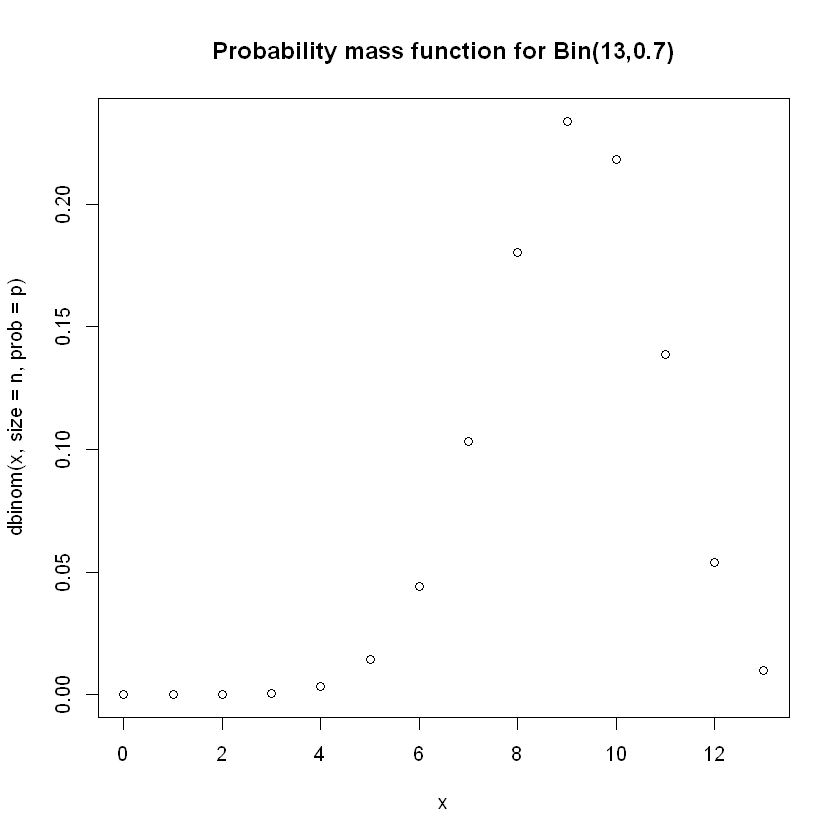

In [23]:
x <- 0:n
plot(x, dbinom(x, size = n, prob = p), main = "Probability mass function for Bin(13,0.7)")

If we want to calculate the probability of observing an outcome less than or equal to a particular value, we can use the cumulative distribution function. For example, what is the probability of observing 9 or fewer successes?

In [24]:
pbinom(9, size = n, prob = p)

[1] 0.5793944

Here is the entire cdf.

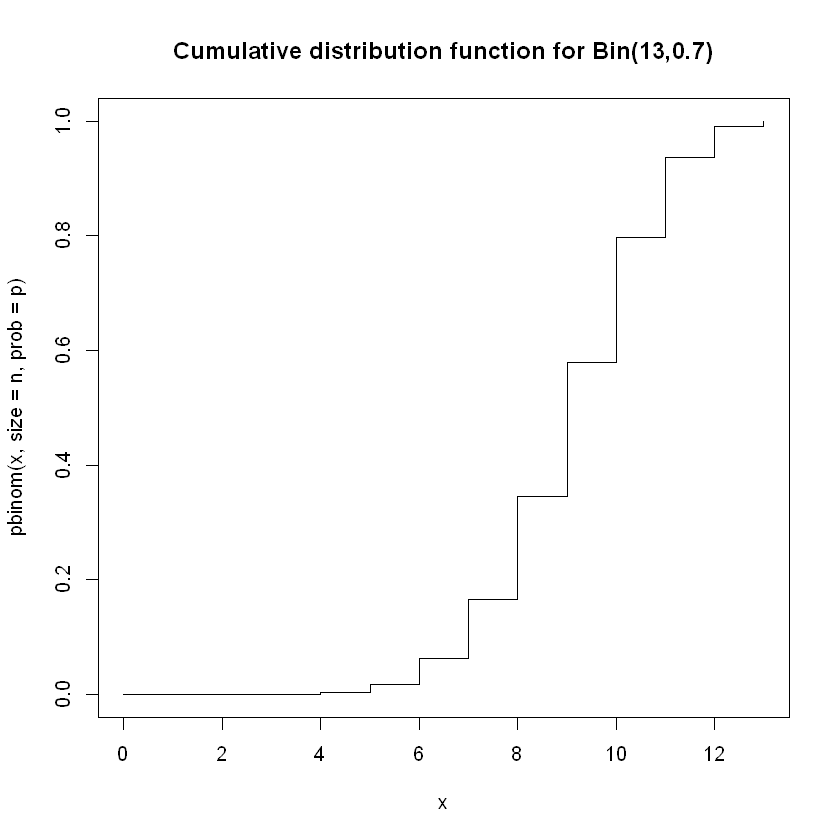

In [25]:
plot(x, pbinom(x, size = n, prob = p), type="s", main = "Cumulative distribution function for Bin(13,0.7)")

For a discrete random variable, the cdf is a step function since the function jumps whenever it comes across a value in the support for the random variable.

Here is the quantile function using the qbinom function:

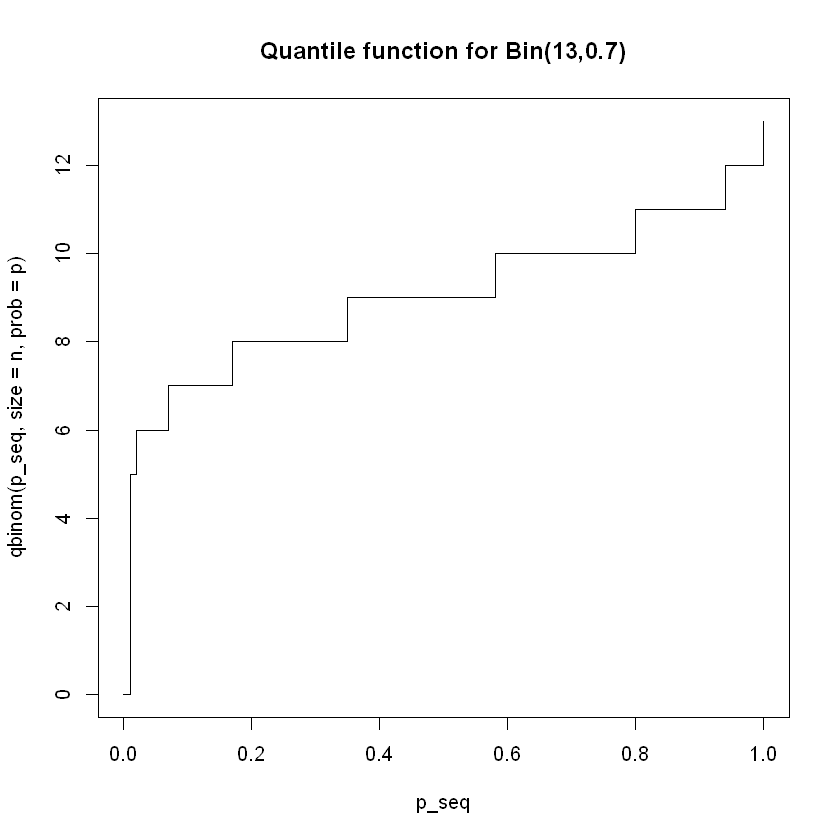

In [26]:
p_seq <- seq(from = 0, to = 1, length = 101)
plot(p_seq, qbinom(p_seq, size = n, prob = p), type="s", main = "Quantile function for Bin(13,0.7)")

Finally, we can draw random values from this binomial distribution using the rbinom function.

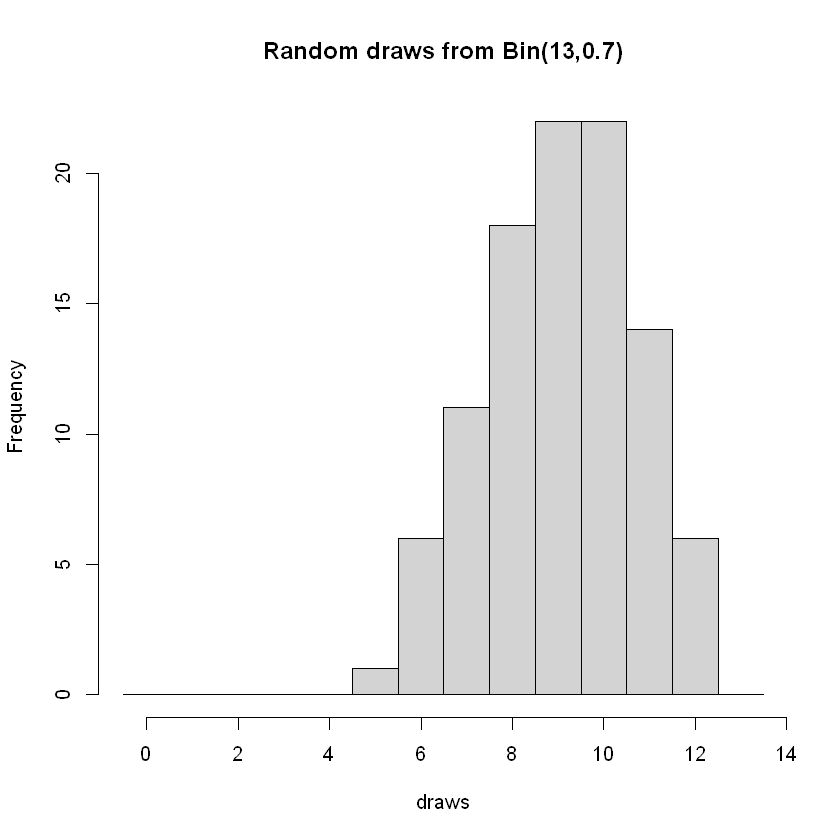

In [27]:
draws <- rbinom(100, size = n, prob = p) # draw 100
brks  <- (0:(n+1)) - 0.5
hist(draws, breaks = brks, main = "Random draws from Bin(13,0.7)") 

Rather than having the number of draws, we often want the percentage of draws. For reference, we can add the true probabilities using the pmf (shown in red).

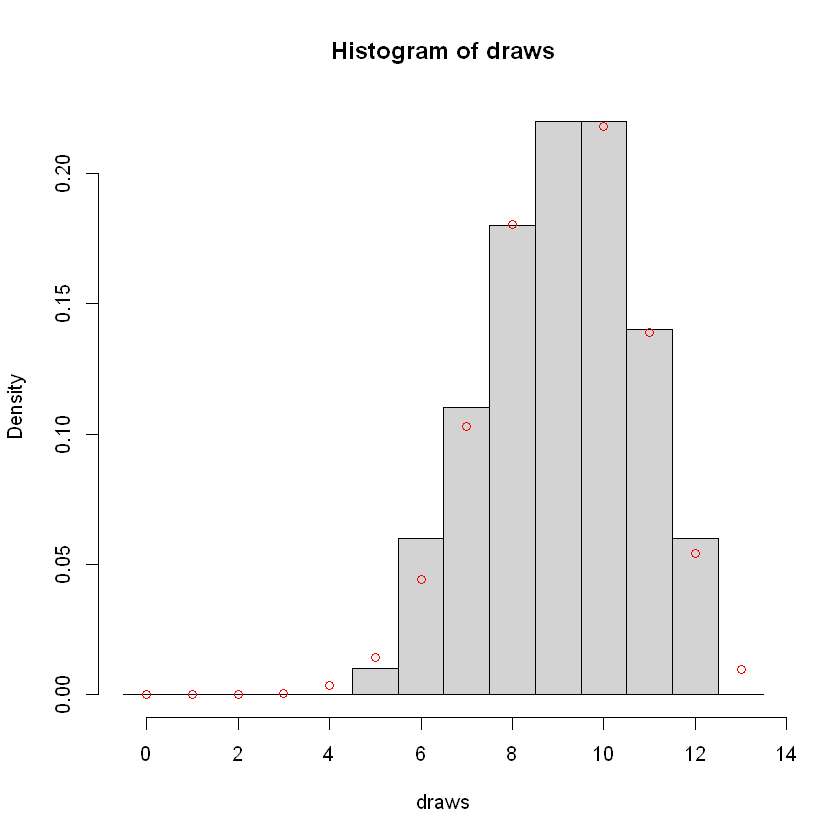

In [28]:
hist(draws, breaks = brks, probability = TRUE)
points(x, dbinom(x, size = n, prob = p), col="red")

\begin{exercise}
Plot the pmf, cdf, and quantile function for the binomial distribution with probability of success 0.25 and 39 trials, i.e. X∼Bin(39,0.25). Then sample 999 random binomials with 39 trials and probability of success 0.25 and plot them on a histogram with the true probability mass function.
\end{exercise}

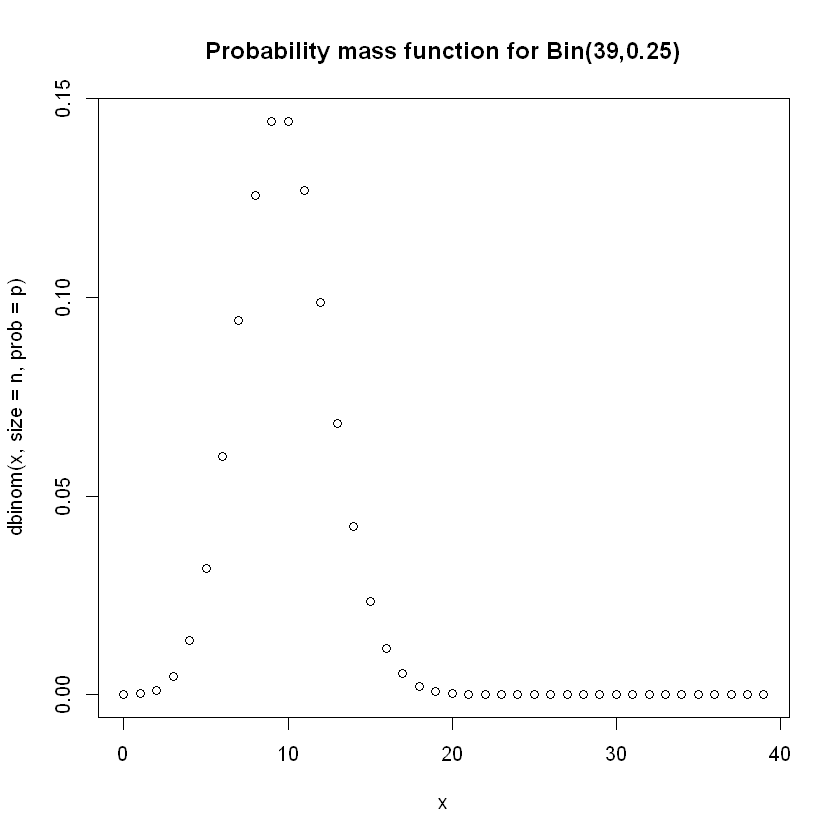

In [29]:
n <- 39
p <- 0.25
x <- 0:n

plot(x, dbinom(x, size = n, prob = p),                     main = 'Probability mass function for Bin(39,0.25)')



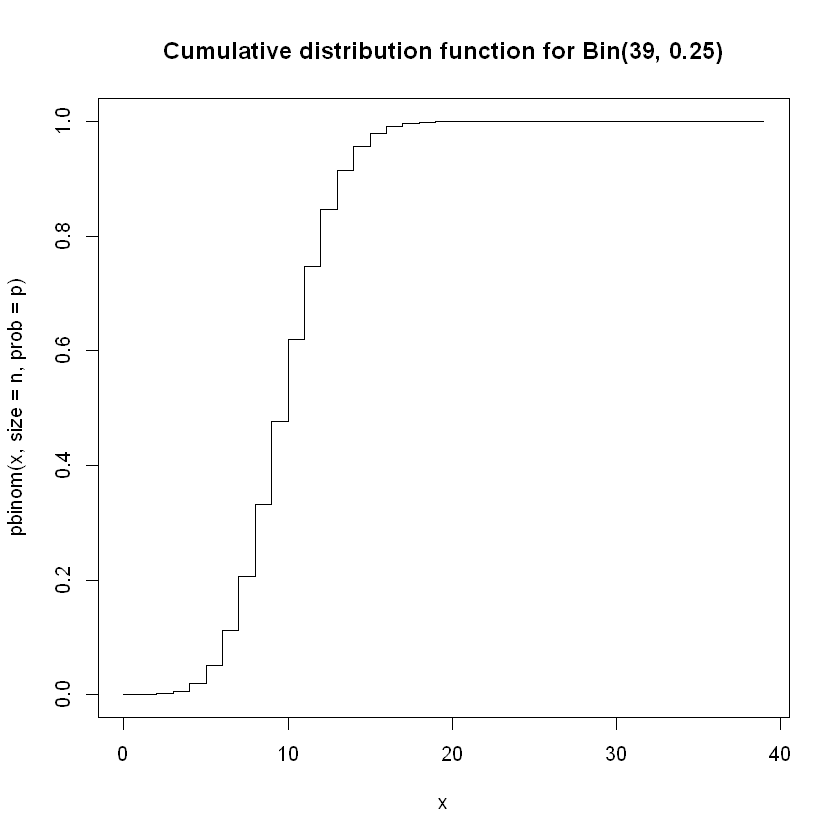

In [30]:
plot(x, pbinom(x, size = n, prob = p),         type = 's', main = 'Cumulative distribution function for Bin(39, 0.25)')

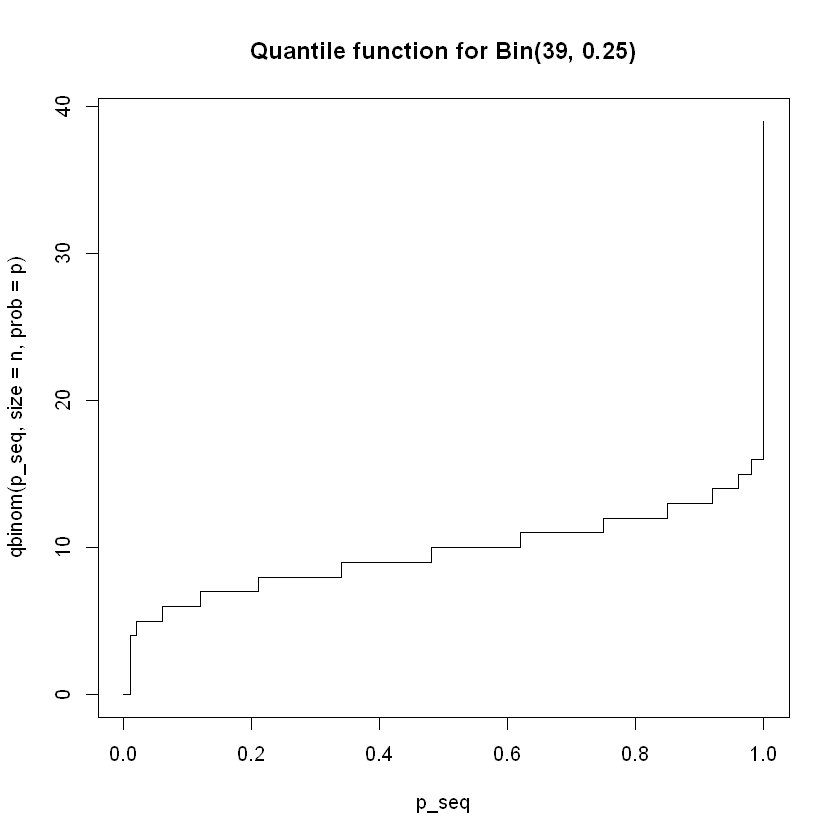

In [31]:
p_seq <- seq(from = 0, to = 1, length = 101)
plot(p_seq, qbinom(p_seq, size = n, prob = p), type = 's', main = 'Quantile function for Bin(39, 0.25)')

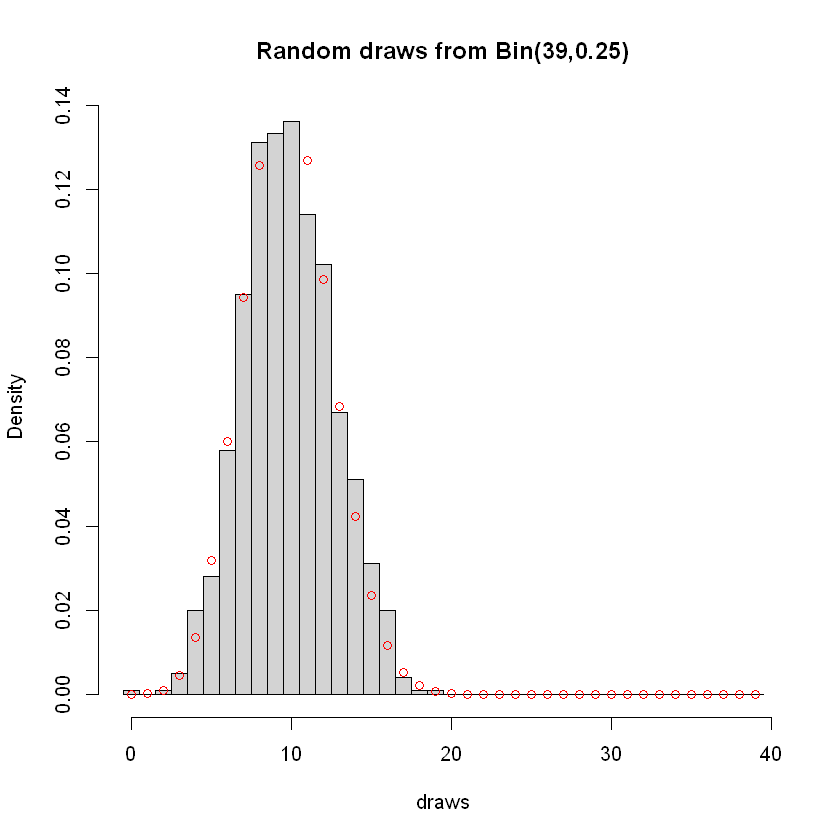

In [32]:
draws <- rbinom(999, size = n, prob = p)
brks  <- (0:(n+1)) - 0.5
hist(draws, breaks = brks, probability = TRUE, main = "Random draws from Bin(39,0.25)")
points(x, dbinom(x, size = n, prob = p), col="red")

### Poisson distribution
While the binomial distribution has an upper limit (n), we sometimes run an experiment and are counting successes without any technical upper limit. These experiments are usually run for some amount of time or over some amount of space. For example,

-the number of photos observed by a detector in a minute

- the number of times an a/c unit comes on in an hour

- the number of buildings in a square mile

- the number of transistors on a circuit board

When there is no technical upper limit (even if the probability of more is extremely small), then a Poisson distribution can be used. The Poisson distribution has a single parameter, the rate that describes, on average, how many of the things are expected to be observed. We write $X \sim P o(\lambda)$ where $\lambda$ is the rate parameter.

\begin{example}
Suppose we record the number of network failures in a day and on average we see 2 failures per day. The number of network failures in a day has no upper limit, so we'll use the Poisson distribution.

\end{example}


Here is the pmf:

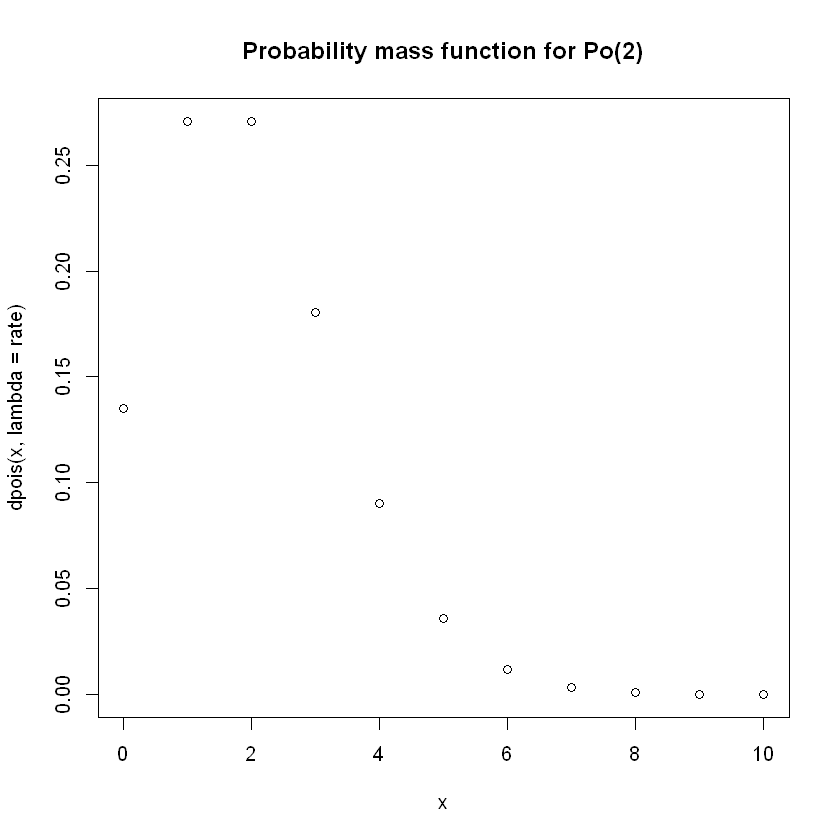

In [33]:
rate <- 2
x <- 0:10 # with no upper limit we need to decide on an upper limit

plot(x, dpois(x, lambda = rate), main = "Probability mass function for Po(2)") 

Here is the cdf:

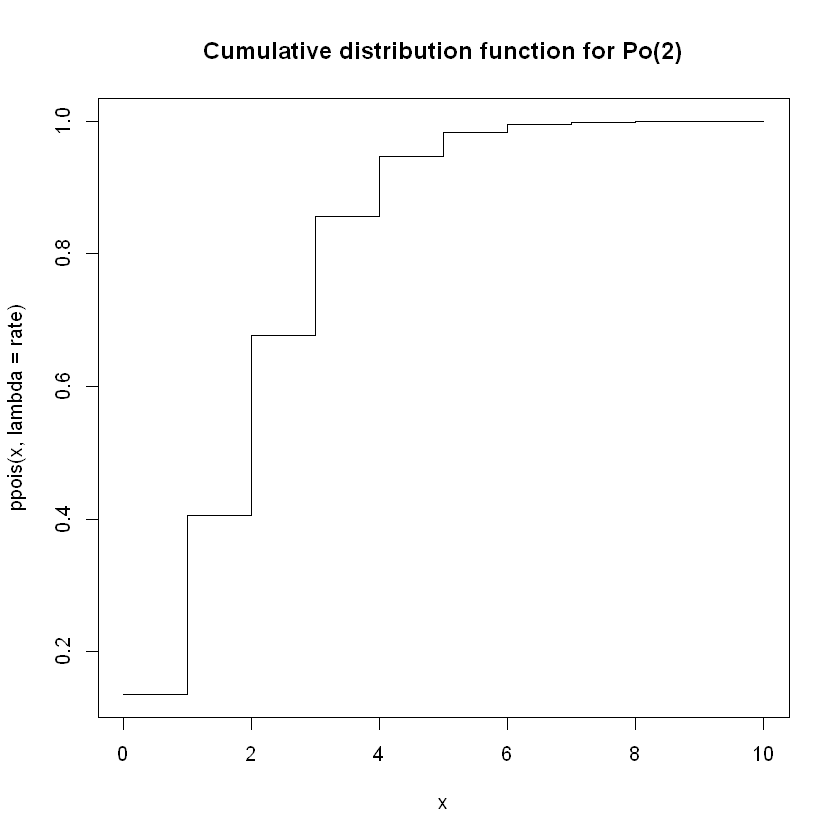

In [34]:
plot(x, ppois(x, lambda = rate), type="s", main = "Cumulative distribution function for Po(2)")

Here is the quantile function:

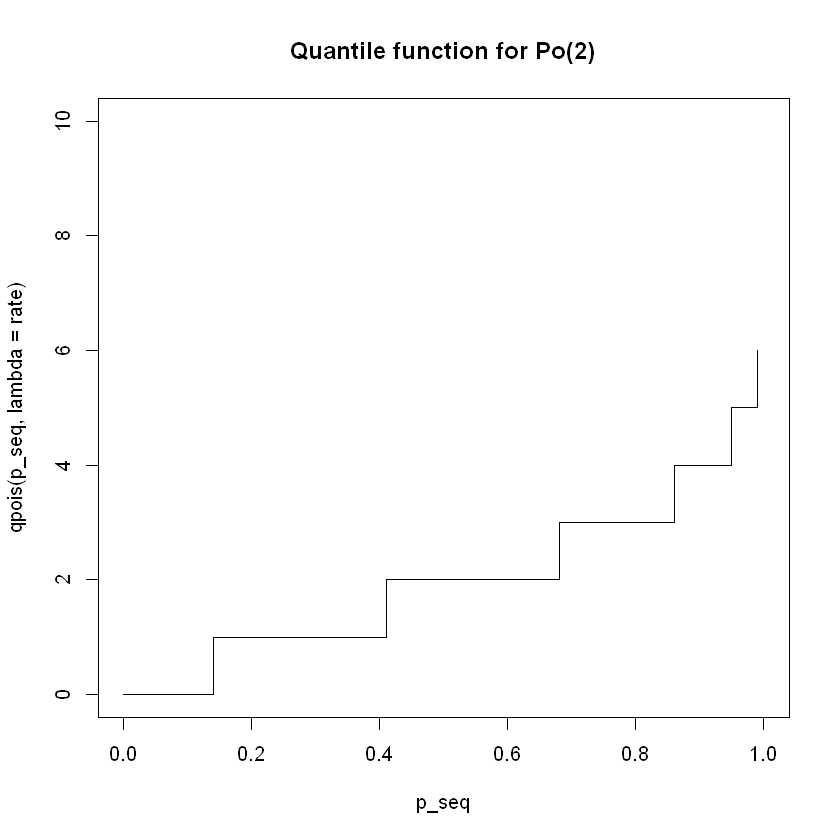

In [35]:
plot(p_seq, qpois(p_seq, lambda = rate), type="s", ylim=c(0,10), main = "Quantile function for Po(2)") # Change the y limits for comparison purposes

And random draws

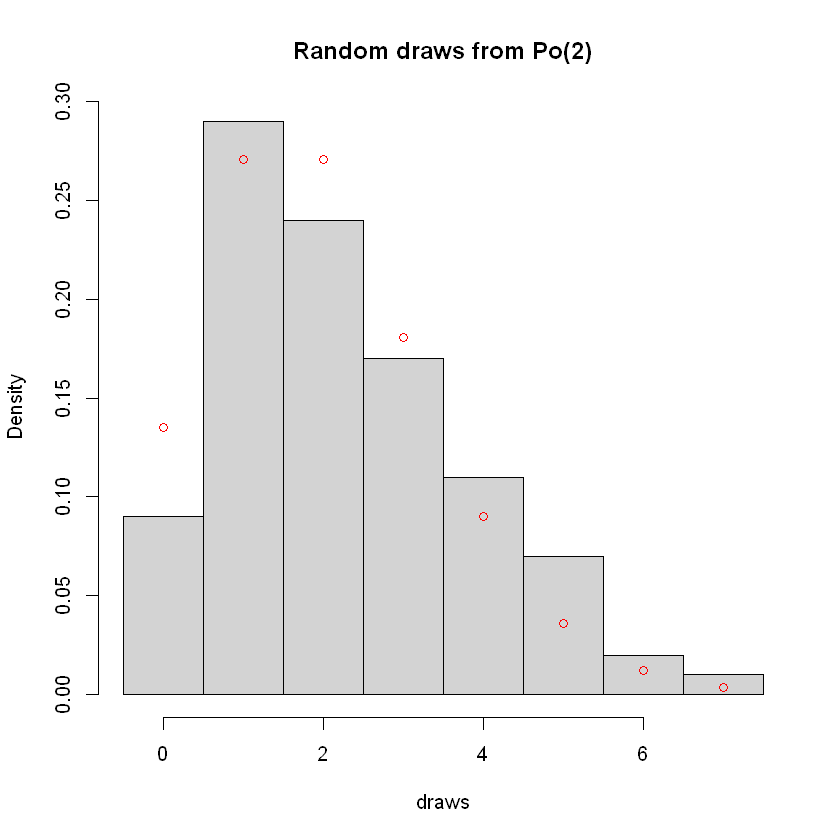

In [36]:
draws <- rpois(100, lambda = rate)

hist(draws, breaks = (0:(max(draws)+1)) - 0.5, probability = TRUE, main = "Random draws from Po(2)")
points(x, dpois(x, lambda = rate), col="red")

\begin{exercise}
Plot the pmf, cdf, and quantile function for a Poisson distribution with rate 23, i.e. $X \sim Po(23)$ . Then sample 999 Poisson random variables with rate 23 and plot them on a histogram with the true probability mass function.
\end{exercise}

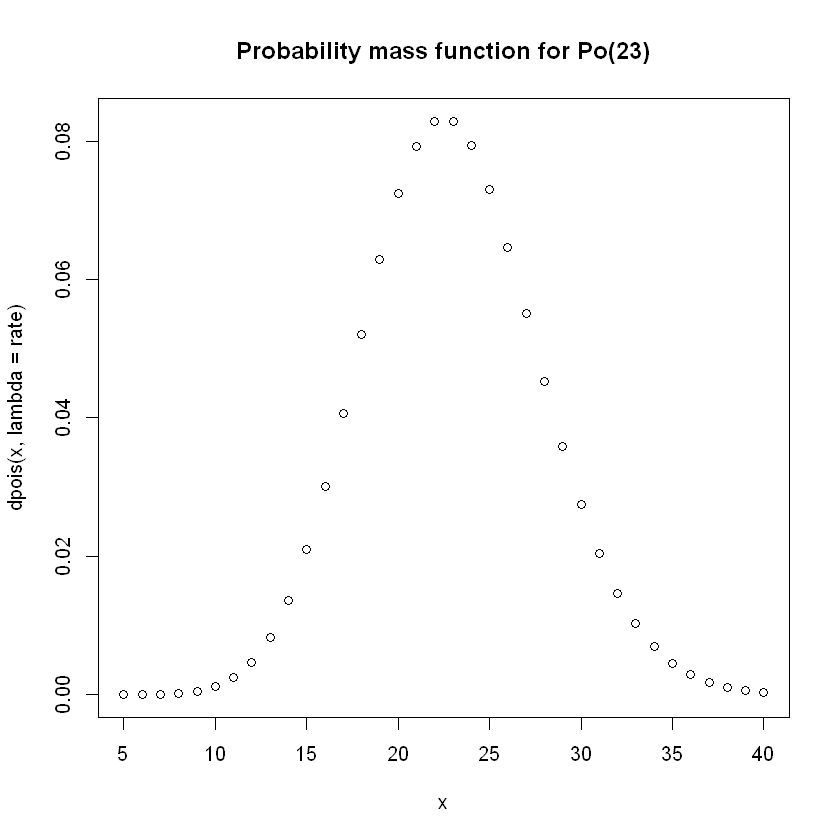

In [37]:
rate <- 23
x <- 5:40 # with no upper limit we need to decide on an upper limit

plot(x, dpois(x, lambda = rate),                   main = 'Probability mass function for Po(23)')

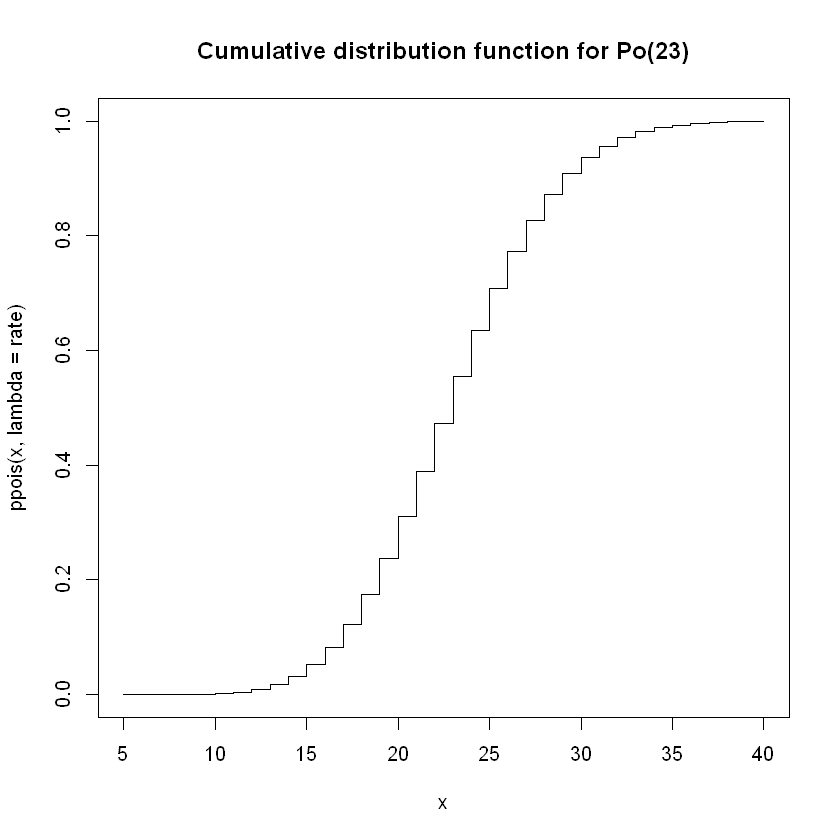

In [38]:
plot(x, ppois(x, lambda = rate),         type="s", main = 'Cumulative distribution function for Po(23)')

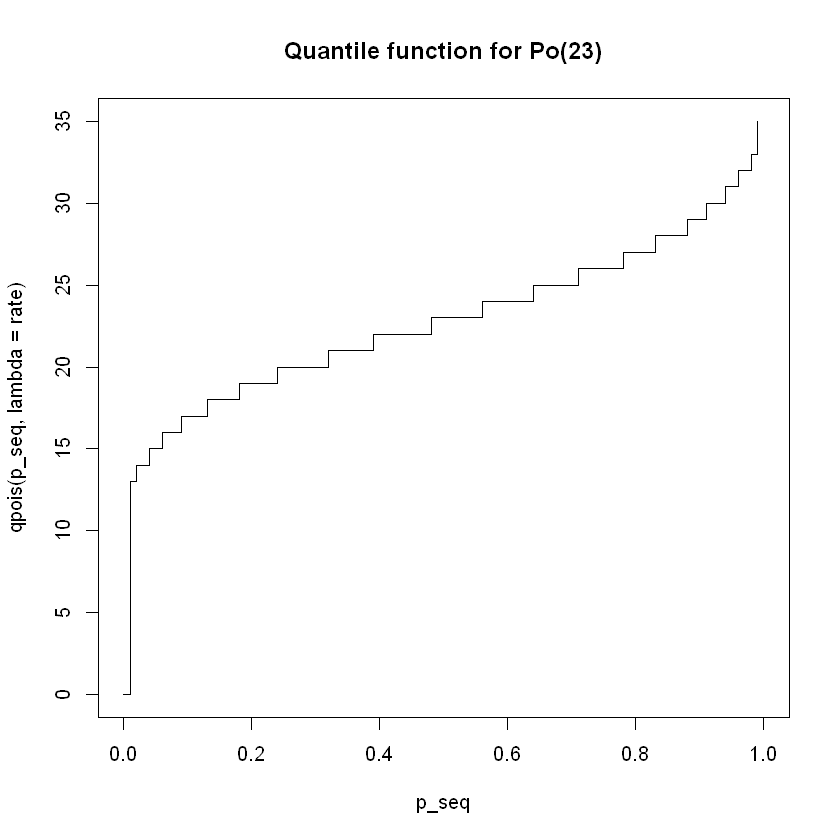

In [39]:
plot(p_seq, qpois(p_seq, lambda = rate), type="s", main = 'Quantile function for Po(23)')



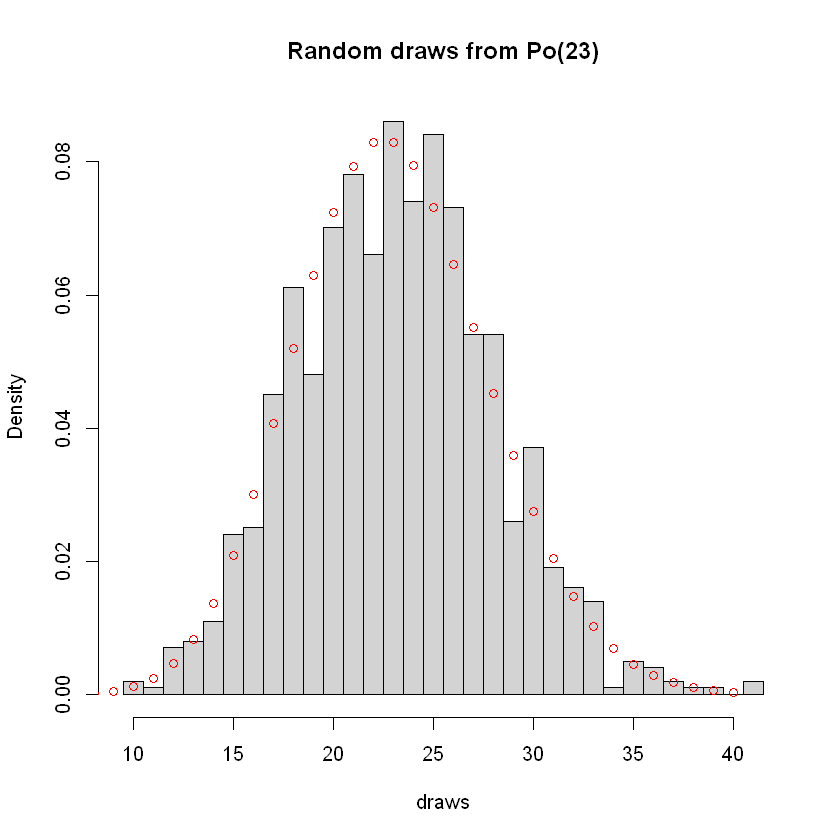

In [40]:
draws <- rpois(999, lambda = rate) 
hist(draws, breaks = (min(draws):(max(draws)+1)) - 0.5, probability = TRUE, main = "Random draws from Po(23)")
points(x, dpois(x, lambda = rate), col="red")



## Continuous distributions

In contrast to discrete random variables, **continuous random variables** can take on an uncountably infinite number of values. The easiest way for this to happen is that the random variable can take on any value between two specified values (and infinity counts).

Continuous random variables have a **probability density function (pdf)** instead of a pmf. When integrated from a to b, this pdf gives the probability the random variable will take on a value between a and b. Continuous random variables still have a cdf, quantile function, and random generator that all still have the same interpretation.

### Uniform distribution

The simplest continuous random variable is the uniform random variable. If $Y$ is a random variable and it is uniformly distributed between a and b, then we write $Y \sim \operatorname{Unif}(a, b)$ and this means that Y can take on any value between a and b with equal probability.

The probability density function for a uniform random variable is zero outside of a and b (indicating that the random variable cannot take values below a or above b and is constant at a value of $1/(b-a)$ from a to b.

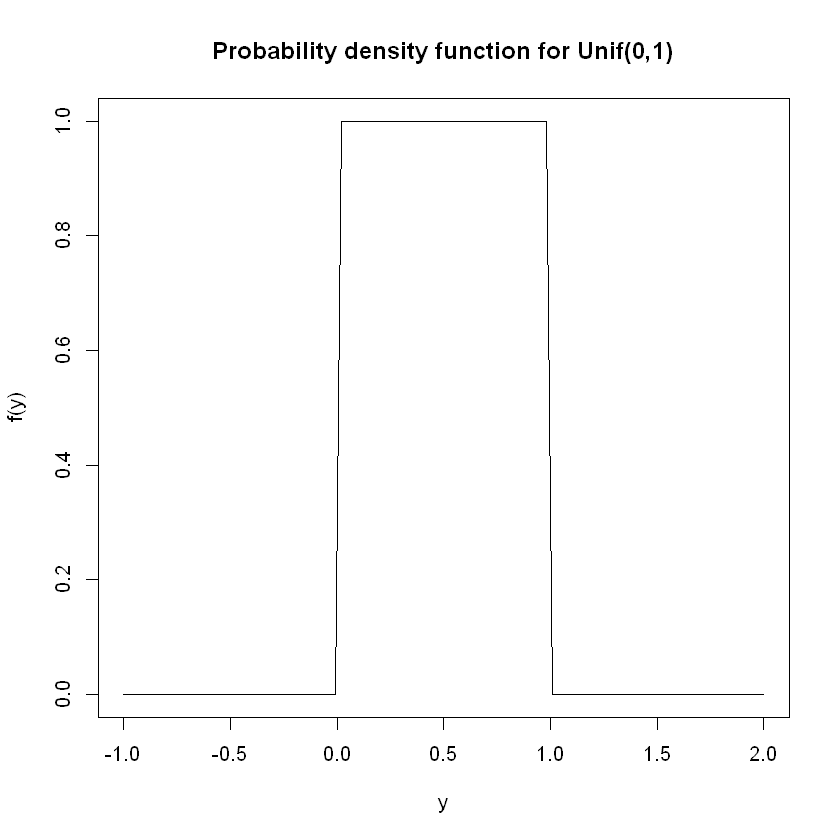

In [41]:
a <- 0
b <- 1

# The curve function expects you to give a function of `x` and then it 
# (internally) creates a sequence of values from `from` and to `to` and creates
# plots similar to what we had before, but using a line rather than points.
curve(dunif(x, min = a, max = b), from = -1, to = 2,
      xlab='y', ylab='f(y)', main='Probability density function for Unif(0,1)')

The **cumulative distribution function** is the integral from negative infinite up to y of the probability density function. Thus, it indicates the probability the random variables will take on values less than y, i.e. $P(Y<y)$. Since the probability density function for the uniform is constant, the integral is simply zero from negative infinite up to a, then a straight line from (a,0) up to (b,1) and then constant after that.

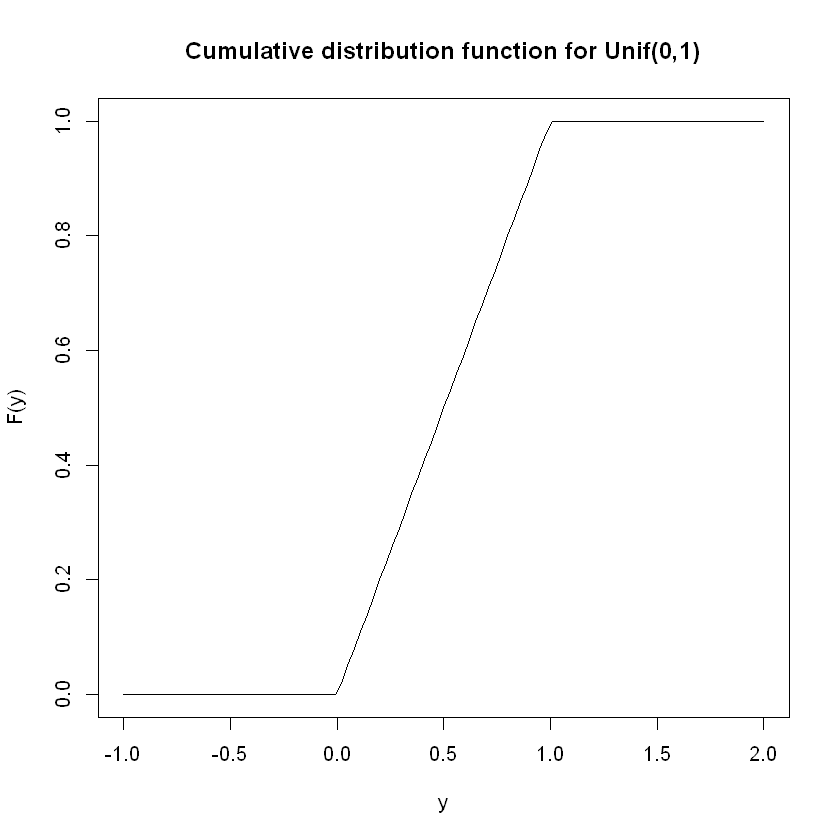

In [42]:
curve(punif(x, min = a, max = b), from = -1, to = 2,
      xlab='y', ylab='F(y)', main='Cumulative distribution function for Unif(0,1)')

The quantile function is the inverse of the cumulative distribution function. For a given probability p, it finds the value such that the probability the random variable is below that value is p.

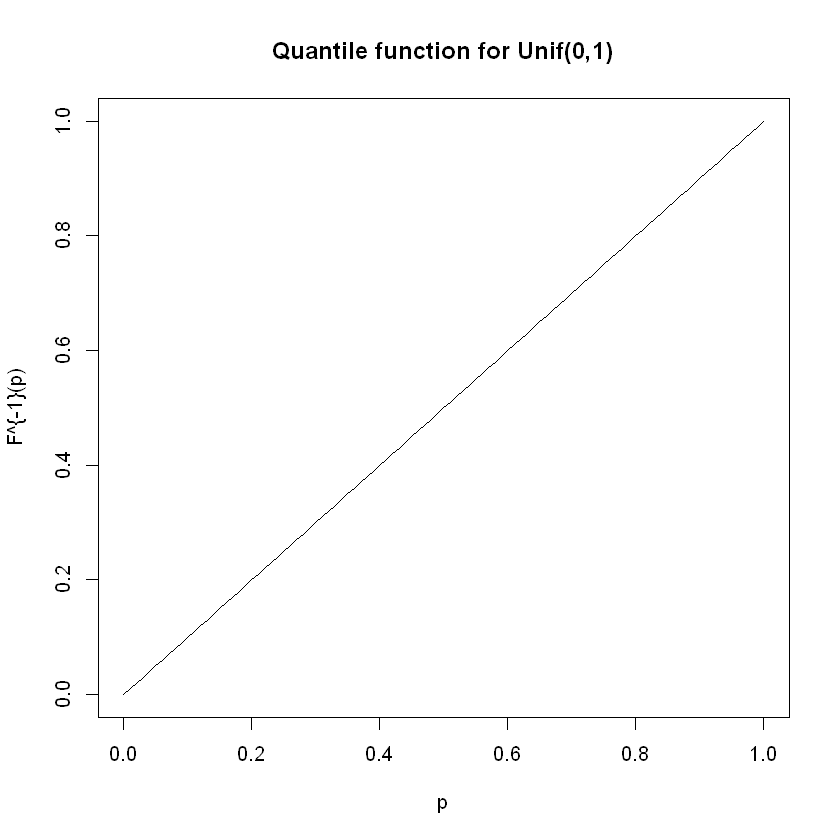

In [43]:
curve(qunif(x, min = a, max = b), from = 0, to = 1,
      xlab='p', ylab='F^{-1}(p)', main='Quantile function for Unif(0,1)')

To draw random values from the distribution, use the r version of the function. For instance, here is 100 random Unif(a,b) draws represented as a histogram.

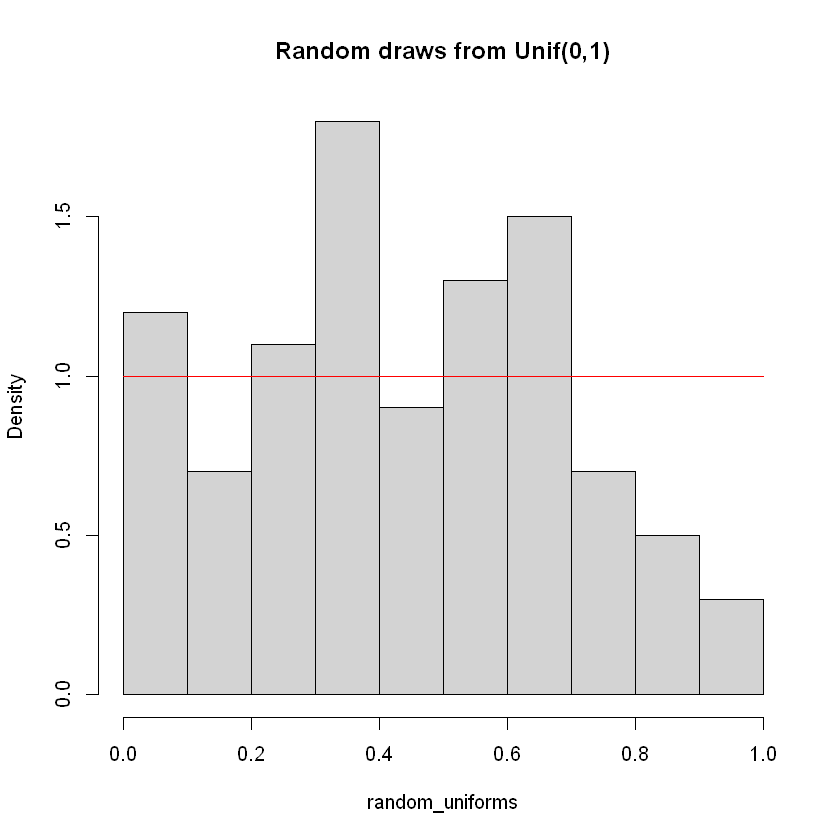

In [44]:
random_uniforms <- runif(100, min = a, max = b)
hist(random_uniforms, probability = TRUE, main = "Random draws from Unif(0,1)")
curve(dunif(x, min = a, max = b), add = TRUE, col="red")

\begin{exercise}
Plot the pdf, cdf, and quantile function for a uniform distribution on the interval (23, 75), i.e. $X \sim \operatorname{Unif}(23,75)$. Then sample 999 random uniforms on the interval (13,65) and plot a histogram of these draws with the probability density function.
\end{exercise}

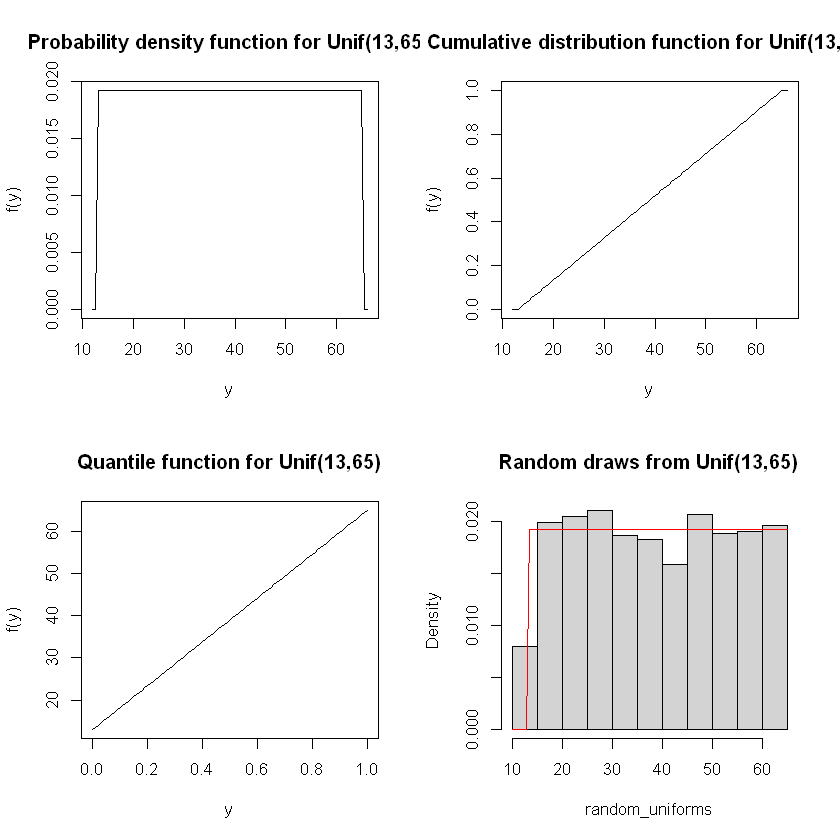

In [45]:
a <- 13
b <- 65

opar = par(mfrow=c(2,2)) # Create a 2x2 grid of figures
curve(dunif(x, min = a, max = b), from = a-1, to = b+1,
      xlab='y', ylab='f(y)', main='Probability density function for Unif(13,65)')
curve(punif(x, min = a, max = b), from = a-1, to = b+1,
      xlab='y', ylab='f(y)', main='Cumulative distribution function for Unif(13,65)')
curve(qunif(x, min = a, max = b), from = 0, to = 1,
      xlab='y', ylab='f(y)', main='Quantile function for Unif(13,65)')
random_uniforms <- runif(999, min = a, max = b)
hist(random_uniforms, probability = TRUE, main = "Random draws from Unif(13,65)")
curve(dunif(x, min = a, max = b), add=TRUE, col="red")


## Normal distribution

The most important distribution for this course is the **normal (Gaussian) distribution**. The normal distribution has two parameters: the mean $(\mu)$ and the variance $\left(\sigma^{2}\right)$ and we write $X \sim N\left(\mu, \sigma^{2}\right) .$ If $\mu=0$ and $\sigma^{2}=1,$ we call the associated random variable a standard normal. The probability density function for the normal distribution is the well-known bell-shaped curve.

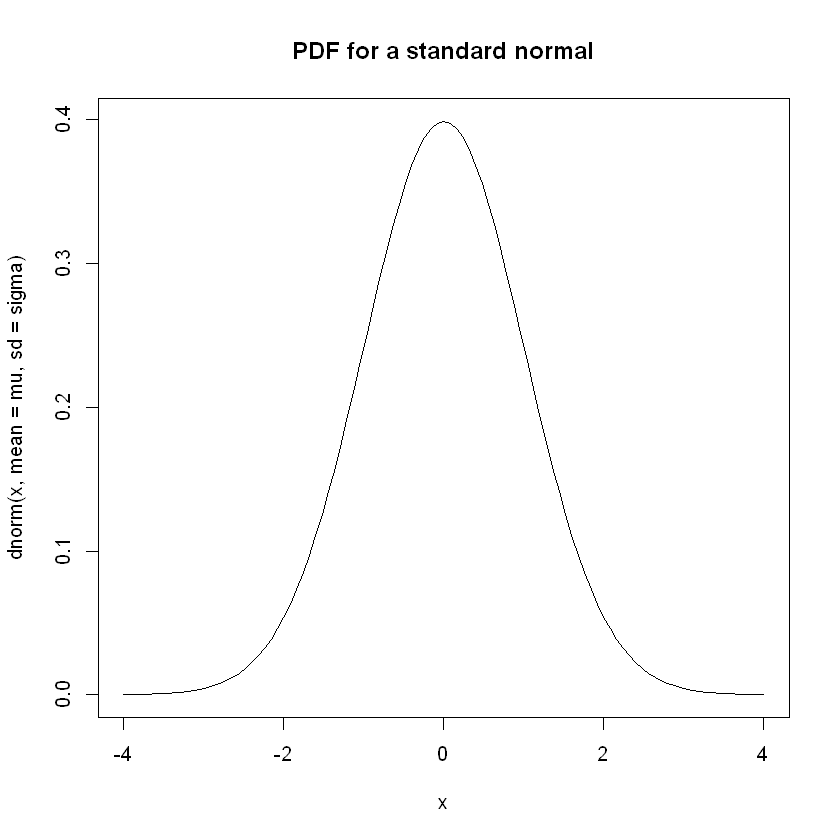

In [46]:
mu    <- 0
sigma <- 1 # standard deviation

curve(dnorm(x, mean = mu, sd = sigma), # notice the 3rd argument is the sd
      from = -4, to = 4,
      main = "PDF for a standard normal")

The quantile function has a sigmoid shape.

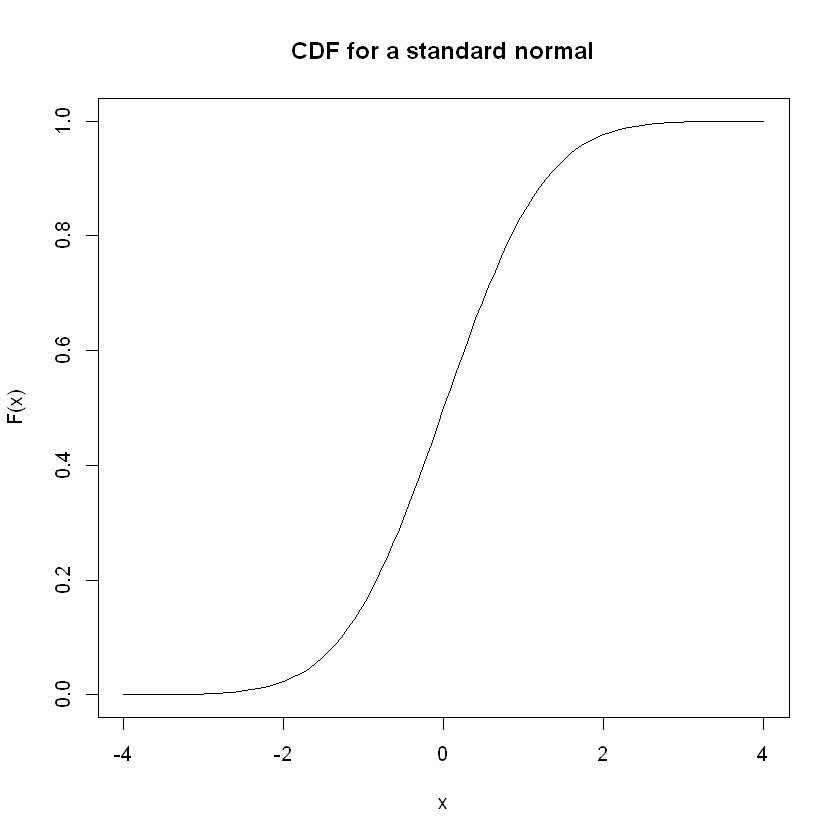

In [47]:
curve(pnorm(x, mean = mu, sd = sigma), 
      from = -4, to = 4,
      main = "CDF for a standard normal",
      ylab = "F(x)")

The quantile function will be used later in the semester to help construct confidence/credible intervals.

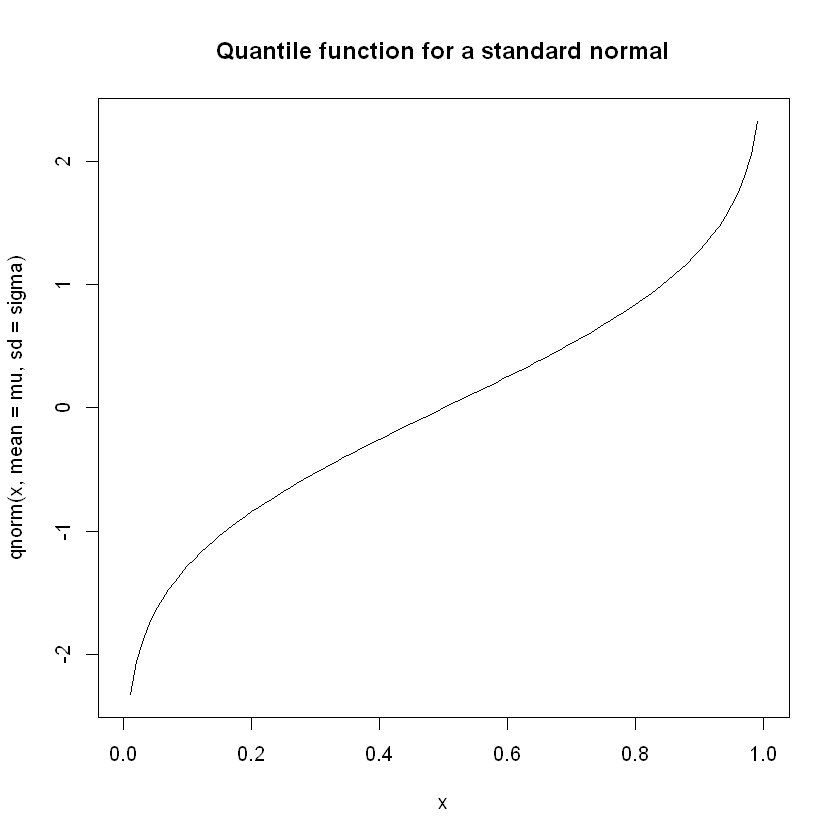

In [48]:
curve(qnorm(x, mean = mu, sd = sigma),
      from = 0, to = 1, 
      main = "Quantile function for a standard normal")

Then we can take random draws

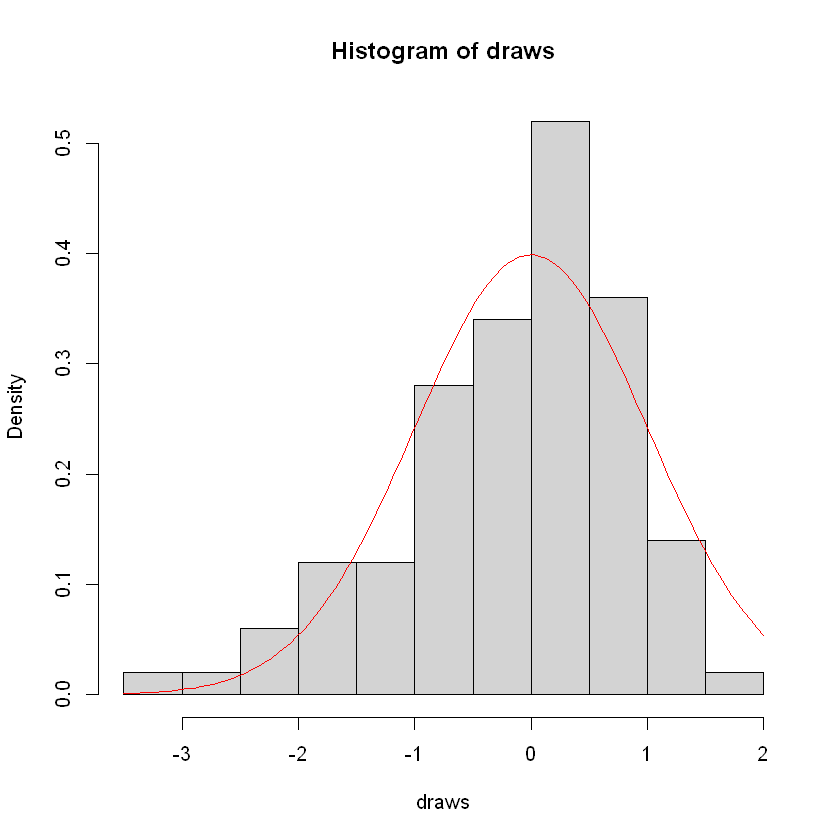

In [49]:
draws <- rnorm(100, mean = mu, sd = sigma)
hist(draws, probability = TRUE)
curve(dnorm(x, mean = mu, sd = sigma), add = TRUE, col = "red")

\begin{exercise}
Plot the pdf, cdf, and quantile function for a normal distribution with mean -4 and variance 3, i.e. $X \sim N(-4,3)$. Then sample 999 random $\mathrm{N}(-4,3)$ and plot a histogram of these draws with the probability density function.

\end{exercise}

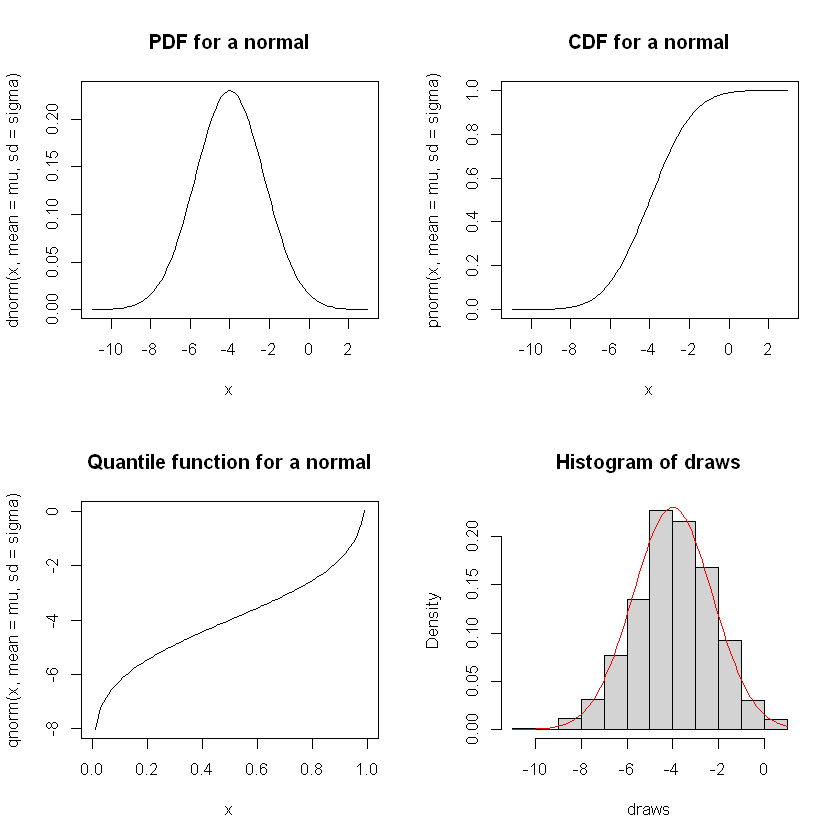

In [50]:
mu    <- -4
sigma <- sqrt(3) # standard deviation!!!

opar = par(mfrow=c(2,2))
curve(dnorm(x, mean = mu, sd = sigma), 
      from = mu-4*sigma, to = mu+4*sigma,
      main = "PDF for a normal")

curve(pnorm(x, mean = mu, sd = sigma), 
      from = mu-4*sigma, to = mu+4*sigma,
      main = "CDF for a normal")

curve(qnorm(x, mean = mu, sd = sigma),
      from = 0, to = 1, 
      main = "Quantile function for a normal")

draws <- rnorm(999, mean = mu, sd = sigma)
hist(draws, probability = TRUE)
curve(dnorm(x, mean = mu, sd = sigma), add = TRUE, col = "red")



## Quantiles of a normal distribution

\begin{exercise}
For any normal random variable, determine the probability it is

* within 1 standard deviation of its mean
* within 2 standard deviation of its mean
* within 3 standard deviation of its mean
\end{exercise}

**Solution**

since this is apparently for any normal, we will just use the standard normal. So if $X \sim N\left(\mu, \sigma^{2}\right),$ we must determine $P(|X|<c)=P(-c<X<c)=P(X<c)-P(X<-c)$ for $c$ in 1,2,3

In [51]:
# Try any values for mu and sigma
mu    <- 0
sigma <- 1

pnorm(mu+1*sigma, mean = mu, sd = sigma) - pnorm(mu-1*sigma, mean = mu, sd = sigma)

[1] 0.6826895

In [52]:
pnorm(mu+2*sigma, mean = mu, sd = sigma) - pnorm(mu-2*sigma, mean = mu, sd = sigma)

[1] 0.9544997

In [53]:
pnorm(mu+3*sigma, mean = mu, sd = sigma) - pnorm(mu-3*sigma, mean = mu, sd = sigma)

[1] 0.9973002

## Binomial questions of interest

\begin{exercise}

Suppose a manufacturing line produces temperature sensors and has a sensor failure proportion equal to $1.5 \% .$ In a given day, the plant tests 70 sensors. If we assume the sensors are independent (given the failure proportion), then $X \sim \operatorname{Bin}(70,0.15)$

Answer the following questions:

* What is the probability no sensors fail in one day?

* What is the probability 3 or more sensors fail in one day?
\end{exercise}

** solution **

The second question is tricky, because we need $P(X \geq 3)=1-P(X<3)=1-P(X \leq 2)$

In [54]:
n <- 70
p <- 0.015

dbinom(0, size = n, prob = p)

[1] 0.3471652

In [55]:
1-pbinom(2, size = n, prob = p)

[1] 0.08833028